## Topic Modeling
- 문서 집합에서 주제를 찾아내기 위한 기술
- '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
- 예로 주제가 '개'라면, 개의 품종, 개의 특성을 나타내는 단어 등이 다른 문서에 비해 많이 등장
- 텍스트 마이닝 기법 중에서 그장 많이 활용되는 기법 중 하나
- 대표 토픽 모델링 방법
- - 잠재 의미 분석(Latent Semantic Analysis)
- - 잠재 디리클레 할당(Latent Dirichlet Allocation)

## Topic Modeling
- 문서 집합에서 주제를 찾아내기 위한 기술
- '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
- 예로 주제가 '개'라면, 개의 품종, 개의 특성을 나타내는 단어 등이 다른 문서에 비해 많이 등장
- 텍스트 마이닝 기법 중에서 그장 많이 활용되는 기법 중 하나
- 대표 토픽 모델링 방법
- - 잠재 의미 분석(Latent Semantic Analysis)
- - 잠재 디리클레 할당(Latent Dirichlet Allocation)

In [1]:
# Gensim : 벡터 변환, 토픽 모델링, 텍스트 요약 등
# 자연어와 텍스트 마이닝 관련 여러 기능을 제공하는 라이브러리

!pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.0.1
    Uninstalling gensim-4.0.1:
      Successfully uninstalled gensim-4.0.1


### News Group Data Load

In [2]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=2022,
                             remove=('headers','footers','quotes'))
print(len(dataset.data))
print(dataset.target_names)

dataset.data[1]

11314
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


"I have the local bus card also, and don't have any such problems with it\nnow, but this is the second card I've gotten - the first card didn't work\nin VGA mode correctly.  Maybe they still have some quality control problems.\nI would suggest checking with ATI (I went through the vendor I bought the\ncard from since the problem showed up immediately).  I never was able to\nget through to ATI's technical support number.  \n\nI sure like the way the card performs though.  I have the 2MB ATI ultra\npro - local bus, and it is fast even in 1024x768x16bpp mode.\n\n\nCheers,\nPhil\n\n"

In [3]:
# 데이터 전처리

import pandas as pd

news_df = pd.DataFrame({'article':dataset.data})
print(len(news_df))
news_df.replace('', float('NaN'), inplace=True)
# 불필요한 공백을 결측값으로 만들어 제거
news_df.dropna(inplace=True)
print(len(news_df))

11314
11096


In [4]:
# 데이터 전처리

import re, nltk, string
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import preprocess_string

# 불용어 파일 다운로드
nltk.download('stopwords')

# 전처리 함수 생성
def clean_text(d):
    d = str(d).lower() # 소문자 처리
    d = re.sub('￦[.*?￦]', '', d) # 특수 기호 처리
    d = re.sub('<.*?>+','',d) # 태그 처리
    d = re.sub('[%s]' % re.escape(string.punctuation), '', d) # 구두점 처리
    d = re.sub('\n','',d) # 계획 문자 처리
    d = re.sub('￦w*￦d￦w*','',d) # 해당 텍스트만 추출
    return d

# 불용어 처리 함수
def clean_stopword(d):
    stop_words = stopwords.words('english') + ['u','im','c'] # 불용어 사전에 줄임말 추가
    return ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w)> 3])
    # d를 공백으로 나눈 것을 w로 추출하여 w가 불용어가 아니고 3자를 초과하면 소문자로 반환하여 join 연산

# 전처리 함수
def preprocessing(d):
    return preprocess_string(d)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
news_df['article']

0        \nThe danger in philosophizing about science i...
1        I have the local bus card also, and don't have...
2        I second the boots... oil spots from cars are ...
3        \n\nOK, the Mets and O's are good examples, bu...
4        Hello,\n\nI'm trying to get a drum program to ...
                               ...                        
11309    Excerpts from the Clipper announcement, with s...
11310    Please unsubscribe pancamo@blkbox.com.  This u...
11311    \nSo what does that have to do with RBI's?  Th...
11312    I got the offer to upgrade this weekend. It's ...
11313    From: Center for Policy Research <cpr>\nSubjec...
Name: article, Length: 11096, dtype: object

In [6]:
# 함수 적용
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article']

0        the danger in philosophizing about science is ...
1        i have the local bus card also and dont have a...
2        i second the boots oil spots from cars are par...
3        ok the mets and os are good examples but what ...
4        helloim trying to get a drum program to work t...
                               ...                        
11309    excerpts from the clipper announcement with so...
11310    please unsubscribe pancamoblkboxcom  this user...
11311    so what does that have to do with rbis  the te...
11312    i got the offer to upgrade this weekend its 19...
11313    from center for policy research subject gaza a...
Name: article, Length: 11096, dtype: object

In [7]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df['article'] 

0        danger philosophizing science theory generaliz...
1        local card also dont problems itnow second car...
2        second boots spots cars particularlyslippery p...
3        mets good examples reds youreally think anyone...
4        helloim trying drum program work downloaded fr...
                               ...                        
11309    excerpts clipper announcement questionsin sect...
11310    please unsubscribe pancamoblkboxcom user becom...
11311    rbis team rbisdoesnt necessarily gameyes runs ...
11312    offer upgrade weekend shipping andhandling see...
11313    center policy research subject gaza separation...
Name: article, Length: 11096, dtype: object

In [8]:
tokenized_news = news_df['article'].apply(preprocessing)
tokenized_news = tokenized_news.to_list()
tokenized_news[2]

['second',
 'boot',
 'spot',
 'car',
 'particularlyslipperi',
 'park',
 'bike',
 'good',
 'boot',
 'help',
 'aswel']

In [9]:
# 어휘집 생성

from gensim.corpora.dictionary import Dictionary

# 사전 생성
dictionary = Dictionary(tokenized_news)
print(len(dictionary))

dictionary.filter_extremes(keep_n=4000, no_below=5, no_above=0.5)
print(len(dictionary))
# 사전에 4000개만을 포함 - 연산 능력(소요 시간) 때문

# Bag of Words 생성
corpus = [dictionary.doc2bow(text) for text in tokenized_news]
print(len(corpus))
# doc2bow : 단어 당 벡터 형태(Counter Vector) / 단어 당 빈도

129833
4000
11096


In [10]:
corpus[2]

[(25, 1),
 (85, 1),
 (94, 1),
 (95, 1),
 (96, 2),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1)]

### 잠재 의미 분석(LSA; Latent Semantic Analysis)
- LSA는 주로 문서 색인(Index)의 의미 검색에 사용
- 잠재 의미 인덱싱(LSI; Latent Semantic Indexing)과 동일
- 목표는 문서와 단어의 기반이 되는 잠재적인 토픽(주제)의 발견
- 잠재적인 토픽은 문서의 단어 분포가 주도한다는 가정
- LSA는 문서 모음에서 생성한 문서-단어 행렬(Document-Term Matrix)에서 단어-토픽 행렬(Term-Topic Matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽-문서 행렬(Topic-Document Matrix)로 분해

In [11]:
# LsiModel

from gensim.models import LsiModel

lsi_model = LsiModel(corpus, num_topics=10,
                     id2word=dictionary) # 구성된 사전에 Mapping
lsi_model.print_topics(num_words=10)


[(0,
  '0.254*"file" + 0.191*"program" + 0.156*"imag" + 0.145*"peopl" + 0.134*"avail" + 0.128*"dont" + 0.128*"work" + 0.126*"includ" + 0.124*"anonym" + 0.124*"like"'),
 (1,
  '-0.281*"file" + 0.227*"peopl" + 0.226*"know" + 0.217*"said" + -0.211*"imag" + 0.184*"dont" + 0.168*"think" + -0.147*"program" + 0.139*"go" + 0.138*"didnt"'),
 (2,
  '0.678*"wire" + 0.263*"ground" + 0.208*"circuit" + 0.194*"outlet" + 0.169*"connect" + 0.153*"neutral" + 0.127*"cabl" + 0.119*"electr" + 0.113*"instal" + 0.096*"requir"'),
 (3,
  '0.395*"anonym" + -0.317*"entri" + -0.252*"file" + 0.211*"post" + 0.207*"internet" + -0.176*"program" + 0.175*"privaci" + 0.145*"mail" + 0.142*"servic" + 0.138*"user"'),
 (4,
  '0.407*"entri" + -0.326*"imag" + -0.231*"drive" + 0.222*"file" + 0.180*"anonym" + -0.148*"disk" + -0.146*"support" + -0.136*"jpeg" + -0.131*"data" + -0.123*"avail"'),
 (5,
  '0.427*"drive" + -0.302*"imag" + 0.244*"disk" + -0.220*"jpeg" + 0.196*"control" + 0.171*"hard" + 0.151*"bio" + -0.148*"anonym" + 0

### LSI에서의 응집도(Coherence)
- 토픽이 얼마나 의미론적으로 일관성이 있는지를 판단
- 값이 높을수록 의미론적 일관성이 높음
- 해당 모델이 실제로 얼마나 의미있는 결과를 나타내는지를 확인하는 지표
- 다른 외부 데이터(Corpus, Thesaurus)를 이용해 평가 진행

In [12]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 5, 15
coherence_scores = []

for num_topics in range(min_topics, max_topics):
    model = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
    coherence = CoherenceModel(model=model,
                               texts=tokenized_news,
                               dictionary=dictionary,
                               coherence='u_mass')
    coherence_scores.append(coherence.get_coherence())
    
print(coherence_scores)

[-2.2347549770054704, -2.1274550729998833, -4.770069716582078, -2.485684157475924, -2.396944622996928, -2.464082413320809, -2.479210387134389, -2.6182538471425483, -2.5846413372505066, -2.950975556058556]


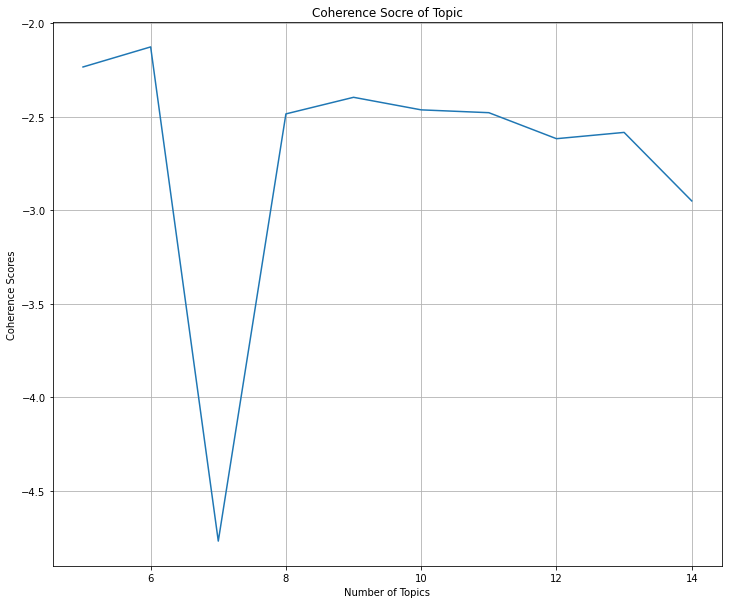

In [13]:
import matplotlib.pyplot as plt

x = [int(x) for x in range(min_topics, max_topics)]

plt.figure(figsize=(12,10))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.title('Coherence Socre of Topic')
plt.grid()
plt.show();

In [14]:
# Coherence Score : 7

lsi_model = LsiModel(corpus, num_topics=7,
                     id2word=dictionary) # 구성된 사전에 Mapping
lsi_model.print_topics(num_words=10)


[(0,
  '0.254*"file" + 0.191*"program" + 0.156*"imag" + 0.145*"peopl" + 0.134*"avail" + 0.128*"dont" + 0.128*"work" + 0.126*"includ" + 0.124*"anonym" + 0.124*"like"'),
 (1,
  '0.281*"file" + -0.227*"peopl" + -0.226*"know" + -0.217*"said" + 0.211*"imag" + -0.184*"dont" + -0.168*"think" + 0.147*"program" + -0.139*"go" + -0.138*"didnt"'),
 (2,
  '-0.678*"wire" + -0.263*"ground" + -0.208*"circuit" + -0.194*"outlet" + -0.169*"connect" + -0.153*"neutral" + -0.127*"cabl" + -0.119*"electr" + -0.113*"instal" + -0.096*"requir"'),
 (3,
  '-0.395*"anonym" + 0.317*"entri" + 0.252*"file" + -0.211*"post" + -0.207*"internet" + 0.176*"program" + -0.175*"privaci" + -0.145*"mail" + -0.142*"servic" + -0.138*"user"'),
 (4,
  '0.407*"entri" + -0.326*"imag" + -0.231*"drive" + 0.222*"file" + 0.180*"anonym" + -0.148*"disk" + -0.146*"support" + -0.136*"jpeg" + -0.131*"data" + -0.123*"avail"'),
 (5,
  '-0.427*"drive" + 0.302*"imag" + -0.244*"disk" + 0.220*"jpeg" + -0.196*"control" + -0.171*"hard" + -0.151*"bio" 

### 잠재 디리클레 할당(LDA; Latent Dirichlet Allocation)
- LDA는 대표적인 토픽 모델링 알고리즘 중 하나
- LDA 방법
- - 사용자가 토픽 개수를 지정하여 알고리즘에 전달
- - 모든 단어를 토픽 중 하나에 할당
- - 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, p(t|d), p(w|t)에 따라 토픽을 재할당하는 과정을 반복(이때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미)
- p(t|d) : 문서 d의 단어 중 토픽 t에 해당하는 비율로, 해당 문서에 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미
- p(w|t) : 단어 w를 포함하는 모든 문서 중 토픽 t가 할당된 비율로, 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미
- LDA는 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합확률로 추정하여 토픽 추출

In [15]:
# 잠재 디리클레 할당 LdaModel

from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=10,
                     id2word=dictionary)
lda_model.print_topics(num_words=10)

[(0,
  '0.010*"work" + 0.008*"file" + 0.007*"look" + 0.007*"like" + 0.006*"server" + 0.006*"bike" + 0.006*"dont" + 0.006*"want" + 0.005*"right" + 0.005*"know"'),
 (1,
  '0.014*"game" + 0.012*"year" + 0.011*"team" + 0.010*"plai" + 0.010*"like" + 0.009*"dont" + 0.008*"think" + 0.007*"player" + 0.007*"time" + 0.007*"good"'),
 (2,
  '0.015*"window" + 0.013*"file" + 0.011*"program" + 0.011*"problem" + 0.009*"card" + 0.009*"work" + 0.008*"need" + 0.008*"line" + 0.007*"drive" + 0.007*"know"'),
 (3,
  '0.011*"peopl" + 0.008*"dont" + 0.008*"believ" + 0.008*"think" + 0.008*"know" + 0.007*"exist" + 0.007*"question" + 0.006*"right" + 0.006*"like" + 0.006*"govern"'),
 (4,
  '0.012*"armenian" + 0.010*"peopl" + 0.010*"said" + 0.008*"time" + 0.007*"dont" + 0.007*"think" + 0.006*"like" + 0.006*"know" + 0.005*"didnt" + 0.005*"kill"'),
 (5,
  '0.022*"space" + 0.011*"launch" + 0.009*"nasa" + 0.008*"satellit" + 0.008*"orbit" + 0.006*"center" + 0.006*"think" + 0.006*"mission" + 0.005*"presid" + 0.005*"time"

### LDA에서의 혼란도(Perplexity)
- 의미 확률 모델이 결과를 얼마나 정확하게 예측하는지를 판단하는 기준
- 토픽 모델링 기법이 얼마나 빠르게 수렴하는지를 확인 가능
- 선정된 토픽 갯수마다 학습시켜 가장 낮은 값을 보이는 구간을 찾아 최적화된 토픽 개수 선정 가능
- 동일 모델 내에서 파라미터에 따라 성능 평가를 할 때 주로 사용
- 혼란도가 낮다고 해서 결과 해석이 용의하다는 의미는 ×

In [16]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics=5,15
perplexity_values = []
coherence_scores = []

for n_topic in range(min_topics, max_topics):
    model = LdaModel(corpus, num_topics=n_topic,
                     id2word=dictionary)
    perplexity_values.append(model.log_perplexity(corpus))
    coherence = CoherenceModel(model=model,
                               texts=tokenized_news,
                               dictionary=dictionary,
                               coherence='u_mass')
    coherence_scores.append(coherence.get_coherence())

print(perplexity_values)
print(coherence_scores)

[-7.448510013221377, -7.493491999639162, -7.42900954645099, -7.4380771256008735, -7.410766500752443, -7.439639525637633, -7.44347413881759, -7.454437002955591, -7.445174846633625, -7.481978888705804]
[-1.7792728651864411, -2.063760509272281, -2.0579884823282795, -2.080986252410617, -1.9503163577985316, -2.183728837167285, -2.1998899548532673, -1.9918375230366747, -2.239527878998965, -2.3626367246849935]


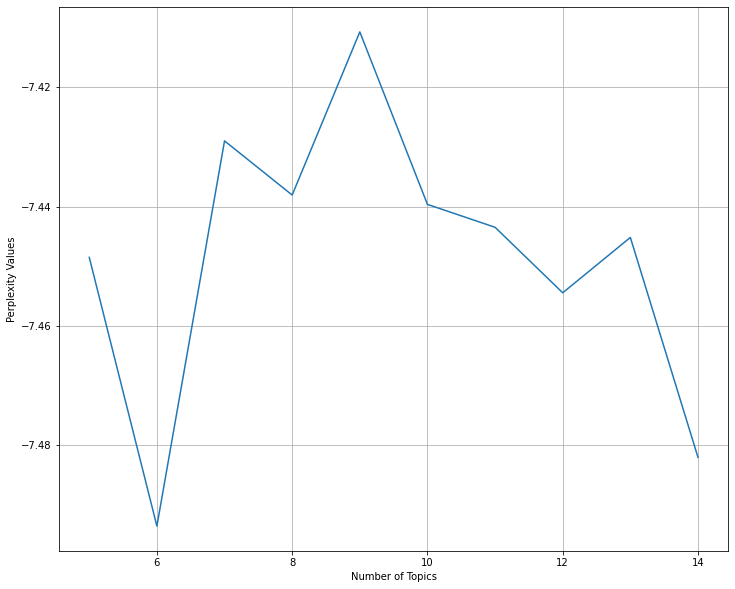

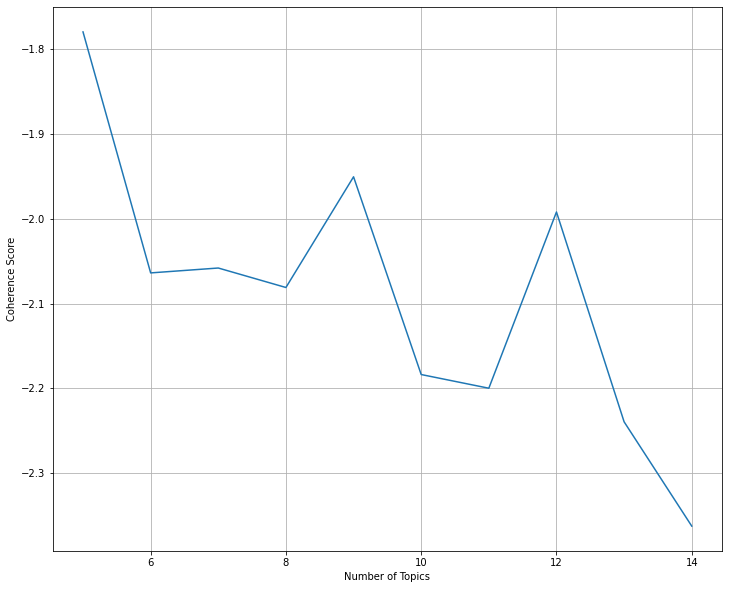

In [17]:
import matplotlib.pyplot as plt

x = [int(x) for x in range(min_topics, max_topics)]

plt.figure(figsize=(12,10))
plt.plot(x, perplexity_values)
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Values')
plt.grid()
plt.show();

plt.figure(figsize=(12,10))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.grid()
plt.show();

In [18]:
lda_model = LdaModel(corpus, num_topics=5,
                     id2word=dictionary)
topic=lda_model.print_topics(num_words=10)
print(topic)

cm = CoherenceModel(model=lda_model,
                    corpus=corpus,
                    coherence='u_mass')
coherence = cm.get_coherence()
print('Coherence :', coherence)
print('Perplexity :', lda_model.log_perplexity(corpus))

[(0, '0.008*"peopl" + 0.008*"armenian" + 0.007*"govern" + 0.006*"state" + 0.006*"year" + 0.005*"space" + 0.005*"research" + 0.005*"center" + 0.005*"nation" + 0.004*"right"'), (1, '0.014*"file" + 0.011*"program" + 0.009*"window" + 0.008*"avail" + 0.007*"work" + 0.006*"includ" + 0.006*"inform" + 0.006*"data" + 0.006*"need" + 0.005*"know"'), (2, '0.011*"think" + 0.008*"dont" + 0.007*"know" + 0.007*"year" + 0.007*"peopl" + 0.006*"like" + 0.006*"team" + 0.006*"right" + 0.006*"plai" + 0.006*"good"'), (3, '0.010*"dont" + 0.010*"peopl" + 0.010*"like" + 0.009*"know" + 0.008*"think" + 0.008*"time" + 0.008*"believ" + 0.007*"thing" + 0.005*"come" + 0.005*"good"'), (4, '0.009*"like" + 0.006*"drive" + 0.006*"time" + 0.006*"power" + 0.005*"card" + 0.005*"price" + 0.005*"year" + 0.005*"control" + 0.004*"look" + 0.004*"space"')]
Coherence : -1.9183297002280848
Perplexity : -7.441301312045078


### LDA 시각화 : pyLDAvis

In [19]:
!pip install -Uqq pyLDAvis==2.1.2

In [20]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


### Topic Trend
- 시간에 따라 토픽의 변화 살펴보기
- Scikit-learn의 LDA를 이용한 토픽 모델링

### ABC News Headline
- http://suanlab.com/datasets/abcnews-data-text.csv

In [21]:
!wget http://suanlab.com/datasets/abcnews-date-text.csv

--2022-09-22 16:15:29--  http://suanlab.com/datasets/abcnews-date-text.csv
Resolving suanlab.com (suanlab.com)... 52.219.60.129
Connecting to suanlab.com (suanlab.com)|52.219.60.129|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62726972 (60M) [text/csv]
Saving to: ‘abcnews-date-text.csv’

abcnews-date-text.c 100%[===================>]  59.82M  17.6MB/s    in 3.4s    

2022-09-22 16:15:33 (17.6 MB/s) - ‘abcnews-date-text.csv’ saved [62726972/62726972]



In [22]:
import pandas as pd

df = pd.read_csv('abcnews-date-text.csv')
df

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1226253,20201231,what abc readers learned from 2020 looking bac...
1226254,20201231,what are the south african and uk variants of ...
1226255,20201231,what victorias coronavirus restrictions mean f...
1226256,20201231,whats life like as an american doctor during c...


In [23]:
df_2020 = df[df.publish_date >= 20100101]
df_2020 = df_2020.reset_index(drop=True)
df_2020

,publish_date,headline_text
0,20100101,12m degas stolen from museum
1,20100101,17 die in bangladesh bus crash
2,20100101,2010 to be drier after very wet 2009
3,20100101,37 catholic workers killed worldwide
4,20100101,600 hurt in philippine new year revelry
...,...,...
715948,20201231,what abc readers learned from 2020 looking bac...
715949,20201231,what are the south african and uk variants of ...
715950,20201231,what victorias coronavirus restrictions mean f...
715951,20201231,whats life like as an american doctor during c...


In [24]:
df_2020['headline_text'] = df_2020['headline_text'].apply(clean_stopword)
df_2020['headline_text'] = df_2020['headline_text'].apply(preprocessing)
tokenized_doc = df_2020['headline_text'].apply(lambda x: [w for w in x if len(w) > 3])
tokenized_doc

0                                    [dega, stolen, museum]
1                                       [bangladesh, crash]
2                                                   [drier]
3                          [cathol, worker, kill, worldwid]
4                          [hurt, philippin, year, revelri]
                                ...                        
715948                          [reader, learn, look, year]
715949                     [south, african, variant, covid]
715950         [victoria, coronaviru, restrict, mean, year]
715951          [what, life, like, american, doctor, covid]
715952    [women, shed, canberra, reskil, unemploi, pandem]
Name: headline_text, Length: 715953, dtype: object

In [25]:
detokenized_hl = []
for i in range(len(df_2020)):
    t = ' '.join(tokenized_doc[i])
    detokenized_hl.append(t)
    
df_2020['headline_text'] = detokenized_hl
df_2020['headline_text']

0                                 dega stolen museum
1                                   bangladesh crash
2                                              drier
3                        cathol worker kill worldwid
4                        hurt philippin year revelri
                             ...                    
715948                        reader learn look year
715949                   south african variant covid
715950        victoria coronaviru restrict mean year
715951          what life like american doctor covid
715952    women shed canberra reskil unemploi pandem
Name: headline_text, Length: 715953, dtype: object

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features=1000)
hl_cv = cv.fit_transform(df_2020['headline_text'])
print(hl_cv.shape)

f_names = cv.get_feature_names_out()
print(f_names)

(715953, 1000)
['abbott' 'aborigin' 'abus' 'access' 'accid' 'accus' 'action' 'activist'
 'adam' 'address' 'adelaid' 'admit' 'affect' 'afghan' 'afghanistan'
 'africa' 'agreement' 'agricultur' 'ahead' 'airport' 'alan' 'alcohol'
 'alert' 'alic' 'alleg' 'allegedli' 'allow' 'america' 'amid' 'analysi'
 'andrew' 'anger' 'anim' 'anniversari' 'announc' 'answer' 'anti' 'anzac'
 'apologis' 'appeal' 'appear' 'appl' 'appoint' 'approv' 'april' 'area'
 'armi' 'arrest' 'arriv' 'artist' 'asbesto' 'asia' 'asian' 'assault'
 'assist' 'asylum' 'attack' 'attempt' 'august' 'aussi' 'australia'
 'australian' 'author' 'avoid' 'awai' 'award' 'babi' 'bail' 'bali' 'bank'
 'barrier' 'base' 'bash' 'basin' 'battl' 'beach' 'beat' 'beef' 'begin'
 'bendigo' 'benefit' 'best' 'better' 'bike' 'biki' 'billion' 'bird'
 'bishop' 'black' 'blame' 'blast' 'blaze' 'block' 'blog' 'blow' 'blue'
 'board' 'boat' 'bodi' 'bomb' 'bomber' 'book' 'boom' 'boost' 'border'
 'boss' 'brawl' 'breach' 'break' 'breakfast' 'bridg' 'brief' 'bring'


In [27]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=7, n_jobs=-1, random_state=2022)
hl_topics = lda_model.fit_transform(hl_cv)

n_topwords = 20
for idx, topic in enumerate(lda_model.components_):
    print('Topic: ', idx)
    print([(f_names[i], topic[i].round(3)) for i in topic.argsort()[:-n_topwords-1:-1]])

Topic:  0
[('interview', 13072.143), ('hous', 6964.724), ('trump', 5550.059), ('west', 4178.949), ('commun', 3973.142), ('world', 3764.571), ('drug', 3747.985), ('lead', 3683.76), ('push', 3479.97), ('releas', 3250.996), ('land', 3075.59), ('australia', 3047.257), ('media', 2964.142), ('prison', 2940.135), ('donald', 2865.142), ('south', 2755.57), ('mayor', 2632.142), ('indigen', 2628.345), ('star', 2529.678), ('john', 2505.268)]
Topic:  1
[('polic', 17373.255), ('elect', 7453.139), ('chang', 7106.67), ('health', 6498.991), ('flood', 6321.41), ('farmer', 5890.137), ('arrest', 4736.914), ('work', 4602.648), ('fight', 4486.632), ('labor', 4314.142), ('park', 3798.016), ('bushfir', 3604.658), ('concern', 3516.778), ('offic', 3444.618), ('green', 3414.766), ('need', 3343.716), ('peopl', 3295.139), ('public', 3215.125), ('inquiri', 3166.134), ('warn', 2967.672)]
Topic:  2
[('school', 6267.141), ('miss', 5792.11), ('open', 5374.135), ('case', 5110.526), ('claim', 4965.12), ('trial', 4843.095

In [28]:
trend_df = pd.DataFrame(hl_topics, columns=['Topic'+str(i) for i in range(1,8)])
trend_df = pd.concat([trend_df, pd.to_datetime(df.publish_date, format='%Y%m%d')], axis=1)
trend_df.set_index('publish_date')

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7
publish_date,,,,,,,
2003-02-19,0.071429,0.571429,0.071429,0.071429,0.071429,0.071429,0.071429
2003-02-19,0.071429,0.071429,0.071429,0.071429,0.571411,0.071446,0.071429
2003-02-19,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
2003-02-19,0.047619,0.047619,0.047619,0.047619,0.047619,0.382386,0.379518
2003-02-19,0.035714,0.035714,0.035742,0.035716,0.285725,0.535675,0.035714
...,...,...,...,...,...,...,...
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
trend = trend_df.groupby(['publish_date']).mean()
trend

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7
publish_date,,,,,,,
2003-02-19,0.101816,0.145259,0.136399,0.112511,0.179570,0.219890,0.104555
2003-02-20,0.170329,0.144490,0.113523,0.126036,0.169387,0.173727,0.102507
2003-02-21,0.134696,0.171084,0.131829,0.096674,0.153911,0.178776,0.133030
2003-02-22,0.153045,0.164076,0.138644,0.111930,0.170102,0.179611,0.082591
2003-02-23,0.179614,0.119464,0.120147,0.138011,0.123363,0.138699,0.180703
...,...,...,...,...,...,...,...
2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


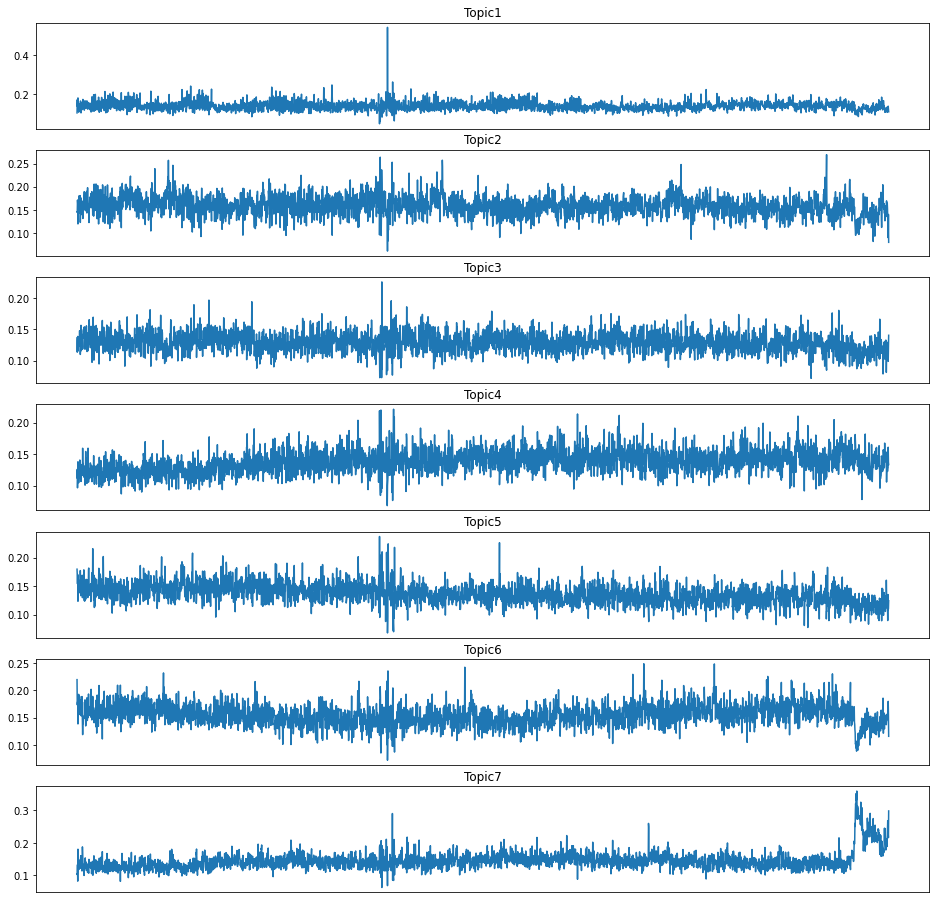

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(7,1, sharex='col', figsize=(16,16))
for col, ax in zip(trend.columns.tolist(), axes.ravel()):
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend[col])
plt.show();